In [2]:
import shap
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
tf.__version__

'2.14.0'

In [5]:
test_dataset = tf.data.Dataset.load('test_dataset')
test_dataset = test_dataset.shuffle(64)

In [6]:
models_encoders = []

saved_dir       = "models/diff_encoders"

for model_file in os.listdir(saved_dir):
    if model_file.endswith(".h5"):
        model_path = os.path.join(saved_dir, model_file)
        model      = tf.keras.models.load_model(model_path)
        models_encoders.append(model)

In [7]:
for model_file in models_encoders:
    print(model_file.name)

MobileNetV2_MNIST
CNN_MNIST
Densenet121-MNIST
EfficientNet-MNIST


(64, 32, 32, 3)
(64, 10)
Normalized values:  (0.0, 0.99607843)


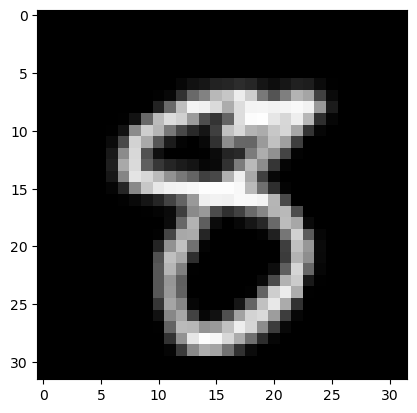

In [8]:
for img_batch, label_batch in test_dataset.take(1):
    print(img_batch.shape)
    print(label_batch.shape)
    img = np.array(img_batch)
    print('Normalized values: ', (np.min(img_batch[0]), np.max(img_batch[0])))
    plt.imshow(img[0])

In [10]:
instance = np.array(img[0])
instance = (instance * 255).astype(np.uint8)
instance = np.expand_dims(instance, axis=0)

def predict_fn(images, model):
    images = images.astype(np.float32) / 255.0
    print(images.shape)
    return model.predict(images)

pred = predict_fn(instance, models_encoders[0])
print(np.argmax(pred))

(1, 32, 32, 3)
1/1 [==============================] - 0s 431ms/step
8


(1, 32, 32, 3)
1/1 [==============================] - 0s 43ms/step
(1, 32, 32, 3)
1/1 [==============================] - 0s 33ms/step
(2, 32, 32, 3)
1/1 [==============================] - 0s 71ms/step
(8, 32, 32, 3)
1/1 [==============================] - 0s 43ms/step
(32, 32, 32, 3)
1/1 [==============================] - 0s 43ms/step
(128, 32, 32, 3)
4/4 [==============================] - 0s 16ms/step
(500, 32, 32, 3)
16/16 [==============================] - 0s 16ms/step
(328, 32, 32, 3)
11/11 [==============================] - 0s 15ms/step
SHAP vizualization for model : MobileNetV2_MNIST


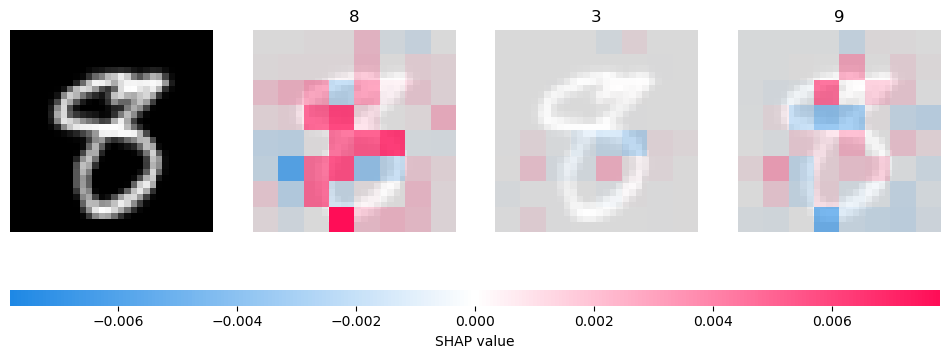

(1, 32, 32, 3)
1/1 [==============================] - 0s 93ms/step
(1, 32, 32, 3)
1/1 [==============================] - 0s 18ms/step
(2, 32, 32, 3)
1/1 [==============================] - 0s 23ms/step
(8, 32, 32, 3)
1/1 [==============================] - 0s 21ms/step
(32, 32, 32, 3)
1/1 [==============================] - 0s 22ms/step
(128, 32, 32, 3)
4/4 [==============================] - 0s 4ms/step
(500, 32, 32, 3)
16/16 [==============================] - 0s 4ms/step
(328, 32, 32, 3)
11/11 [==============================] - 0s 4ms/step
SHAP vizualization for model : CNN_MNIST


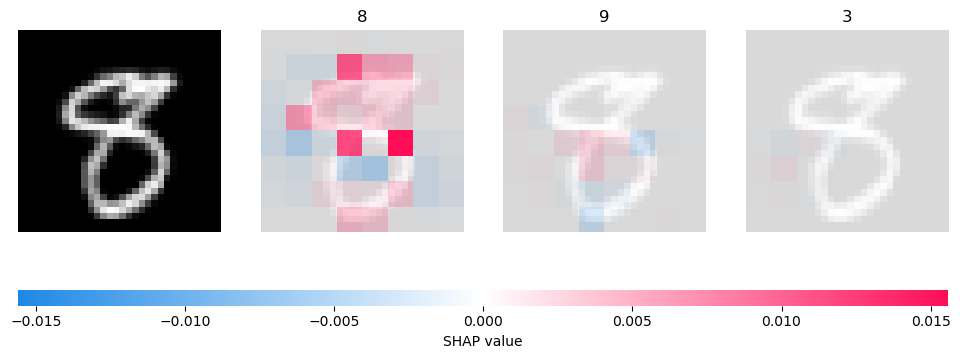

(1, 32, 32, 3)
1/1 [==============================] - 2s 2s/step
(1, 32, 32, 3)
1/1 [==============================] - 0s 66ms/step
(2, 32, 32, 3)
1/1 [==============================] - 0s 95ms/step
(8, 32, 32, 3)
1/1 [==============================] - 0s 95ms/step
(32, 32, 32, 3)
1/1 [==============================] - 0s 111ms/step
(128, 32, 32, 3)
4/4 [==============================] - 0s 58ms/step
(500, 32, 32, 3)
16/16 [==============================] - 1s 58ms/step
(328, 32, 32, 3)
11/11 [==============================] - 1s 53ms/step
SHAP vizualization for model : Densenet121-MNIST


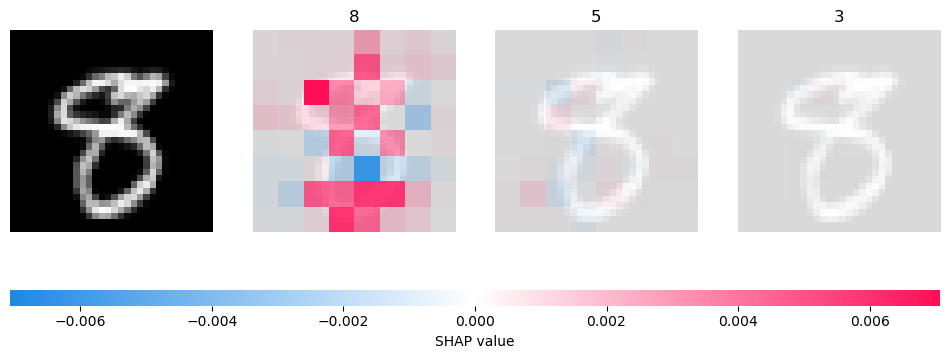

(1, 32, 32, 3)
1/1 [==============================] - 1s 1s/step
(1, 32, 32, 3)
1/1 [==============================] - 0s 49ms/step
(2, 32, 32, 3)
1/1 [==============================] - 0s 79ms/step
(8, 32, 32, 3)
1/1 [==============================] - 0s 69ms/step
(32, 32, 32, 3)
1/1 [==============================] - 0s 85ms/step
(128, 32, 32, 3)
4/4 [==============================] - 0s 40ms/step
(500, 32, 32, 3)
16/16 [==============================] - 1s 40ms/step
(328, 32, 32, 3)
11/11 [==============================] - 0s 37ms/step
SHAP vizualization for model : EfficientNet-MNIST


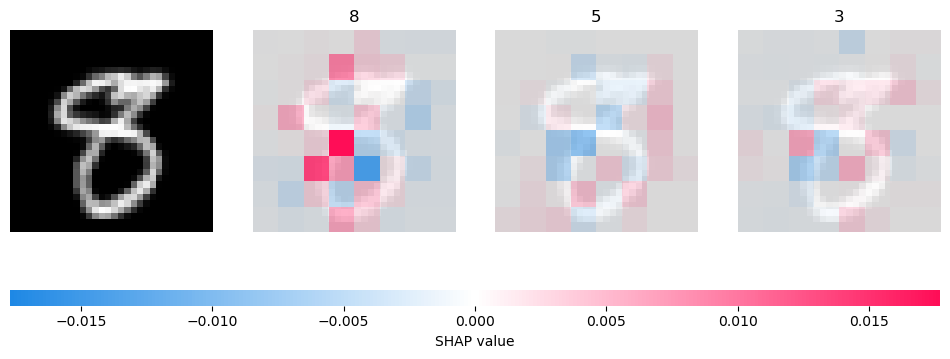

In [12]:
class_names = [str(i) for i in range(10)]

masker = shap.maskers.Image("inpaint_telea", (32,32,3))
# dict to store SHAP values for each model
model_shap_values = {}

for model in models_encoders:
    explainer      = shap.Explainer(lambda x : predict_fn(x, model), 
                               masker,
                               output_names=class_names)
    shap_values    = explainer(
        instance, 
        batch_size = 500, 
        max_evals  = 1000, 
        outputs=shap.Explanation.argsort.flip[:3])

    model_shap_values[model.name] = shap_values.values[0]
    
    print(F"SHAP vizualization for model : {model.name}")
    # Visualize the SHAP values (optional step for analysis)
    shap.image_plot(shap_values)

In [13]:
import helper_functions

sample_lists = [helper_functions.get_sample(i, test_dataset) for i in range(10)]

In [14]:
preds_encods    = [helper_functions.get_predictions(models_encoders, sample_list) for sample_list in sample_lists]
newlists_encods = [helper_functions.filter_correct_predictions(prediction) for prediction in preds_encods]

Wrong Prediction at index 53 by MobileNetV2_MNIST: Predicted [6], True 0
Wrong Prediction at index 155 by MobileNetV2_MNIST: Predicted [2], True 0
Wrong Prediction at index 192 by Densenet121-MNIST: Predicted [6], True 1
Wrong Prediction at index 214 by MobileNetV2_MNIST: Predicted [8], True 1
Wrong Prediction at index 32 by EfficientNet-MNIST: Predicted [1], True 2
Wrong Prediction at index 36 by EfficientNet-MNIST: Predicted [3], True 2
Wrong Prediction at index 50 by MobileNetV2_MNIST: Predicted [8], True 2
Wrong Prediction at index 87 by CNN_MNIST: Predicted [7], True 2
Wrong Prediction at index 186 by CNN_MNIST: Predicted [7], True 2
Wrong Prediction at index 93 by MobileNetV2_MNIST: Predicted [5], True 3
Wrong Prediction at index 183 by CNN_MNIST: Predicted [7], True 3
Wrong Prediction at index 185 by Densenet121-MNIST: Predicted [8], True 3
Wrong Prediction at index 29 by CNN_MNIST: Predicted [9], True 4
Wrong Prediction at index 53 by CNN_MNIST: Predicted [9], True 4
Wrong Pred

In [15]:
%%time
import SHAP
import contextlib

save_directory = 'shap_expls/diff_extrcs'

with open(os.devnull, 'w') as f:
    with contextlib.redirect_stdout(f):
        SHAP.generate_and_save_explanations(newlists_encods, models_encoders, save_directory)

CPU times: user 20h 3min 11s, sys: 2h 57min 18s, total: 23h 30s
Wall time: 4h 13min 24s


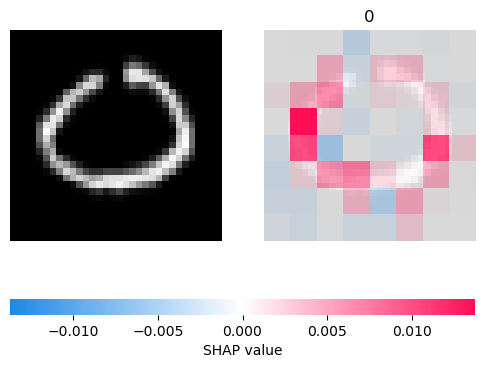

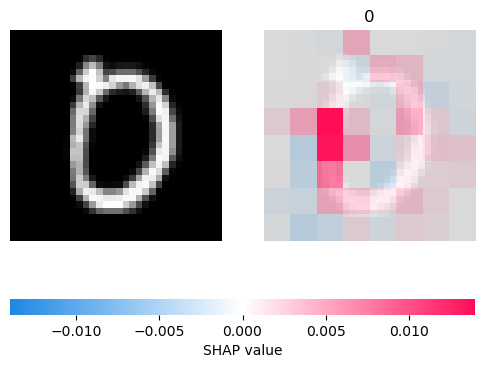

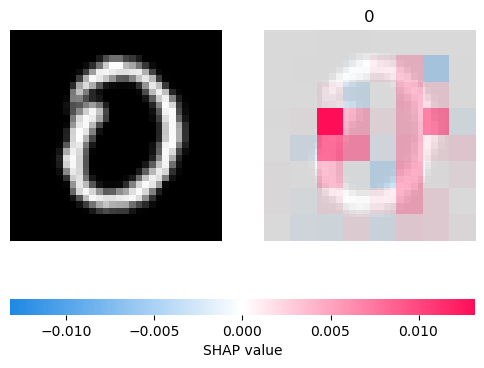

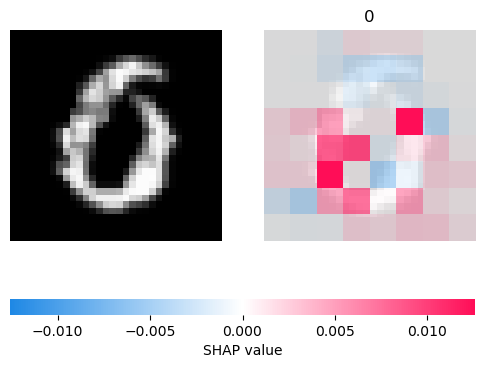

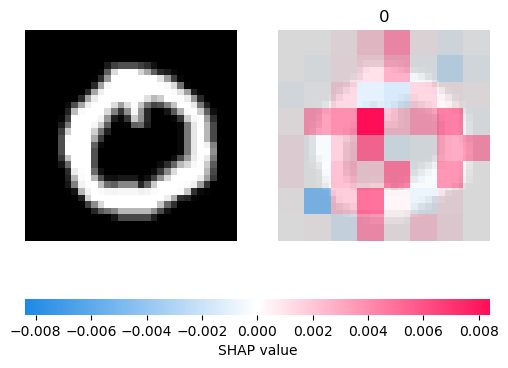

In [17]:
import pickle
import shap

with open("shap_expls/diff_extrcs/explain_0_MobileNet_shap.pkl", "rb") as file:
    expls = pickle.load(file)

for expl in expls[:5]:
    shap.image_plot(expl)

In [1]:
###################################################################################

In [16]:
models_opts = []

saved_dir = "models/diff_optimizers"

for model_file in os.listdir(saved_dir):
    if model_file.endswith(".h5"):
        model_path = os.path.join(saved_dir, model_file)
        model      = tf.keras.models.load_model(model_path)
        models_opts.append(model)

In [17]:
for model in models_opts:
    print(model.name)

CNN-MNIST-Adam
CNN_MNIST-SGD
CNN-MNIST-RMSprop
CNN-MNIST-Nadam


In [18]:
# filter out samples (take only correctly predicted samples) for models with different optimizers
preds_opts    = [helper_functions.get_predictions(models_opts, sample_list) for sample_list in sample_lists]
newlists_opts = [helper_functions.filter_correct_predictions(prediction) for prediction in preds_opts]

Wrong Prediction at index 42 by CNN-MNIST-Nadam: Predicted [2], True 0
Wrong Prediction at index 138 by CNN-MNIST-Nadam: Predicted [8], True 0
Wrong Prediction at index 155 by CNN-MNIST-RMSprop: Predicted [7], True 0
Wrong Prediction at index 50 by CNN-MNIST-Nadam: Predicted [8], True 2
Wrong Prediction at index 63 by CNN-MNIST-RMSprop: Predicted [7], True 2
Wrong Prediction at index 87 by CNN-MNIST-RMSprop: Predicted [7], True 2
Wrong Prediction at index 186 by CNN_MNIST-SGD: Predicted [7], True 2
Wrong Prediction at index 195 by CNN-MNIST-RMSprop: Predicted [8], True 2
Wrong Prediction at index 93 by CNN_MNIST-SGD: Predicted [5], True 3
Wrong Prediction at index 144 by CNN_MNIST-SGD: Predicted [5], True 3
Wrong Prediction at index 29 by CNN_MNIST-SGD: Predicted [9], True 4
Wrong Prediction at index 53 by CNN-MNIST-Adam: Predicted [9], True 4
Wrong Prediction at index 89 by CNN_MNIST-SGD: Predicted [6], True 4
Wrong Prediction at index 97 by CNN_MNIST-SGD: Predicted [9], True 4
Wrong 

In [19]:
save_directory = 'shap_expls/diff_optimizers'

with open(os.devnull, 'w') as f:
    with contextlib.redirect_stdout(f):
        SHAP.generate_and_save_explanations(newlists_opts, models_opts, save_directory)

In [20]:
models_seeds = []

saved_dir    = "models/diff_seeds"

for model_file in os.listdir(saved_dir):
    if model_file.endswith(".h5"):
        model_path = os.path.join(saved_dir, model_file)
        model      = tf.keras.models.load_model(model_path)
        models_seeds.append(model)

In [21]:
for i, model in enumerate(models_seeds):
    model._name = f"CNN{i+1}"
    print(model.name)

CNN1
CNN2
CNN3
CNN4
CNN5
CNN6
CNN7
CNN8
CNN9
CNN10


In [22]:
# filter out samples (take only correctly predicted samples) for models with different optimizers
preds_seeds    = [helper_functions.get_predictions(models_seeds, sample_list) for sample_list in sample_lists]
newlists_seeds = [helper_functions.filter_correct_predictions(prediction) for prediction in preds_seeds]

Wrong Prediction at index 42 by CNN1: Predicted [2], True 0
Wrong Prediction at index 53 by CNN5: Predicted [6], True 0
Wrong Prediction at index 138 by CNN2: Predicted [6], True 0
Wrong Prediction at index 155 by CNN2: Predicted [6], True 0
Wrong Prediction at index 2 by CNN3: Predicted [7], True 2
Wrong Prediction at index 63 by CNN3: Predicted [7], True 2
Wrong Prediction at index 69 by CNN3: Predicted [7], True 2
Wrong Prediction at index 87 by CNN5: Predicted [7], True 2
Wrong Prediction at index 186 by CNN3: Predicted [7], True 2
Wrong Prediction at index 195 by CNN9: Predicted [8], True 2
Wrong Prediction at index 93 by CNN2: Predicted [5], True 3
Wrong Prediction at index 144 by CNN2: Predicted [5], True 3
Wrong Prediction at index 183 by CNN10: Predicted [7], True 3
Wrong Prediction at index 29 by CNN6: Predicted [9], True 4
Wrong Prediction at index 50 by CNN3: Predicted [1], True 4
Wrong Prediction at index 53 by CNN3: Predicted [9], True 4
Wrong Prediction at index 89 by CN

In [23]:
%%time
save_directory = 'shap_expls/diff_seeds'

with open(os.devnull, 'w') as f:
    with contextlib.redirect_stdout(f):
        SHAP.generate_and_save_explanations(newlists_seeds, models_seeds, save_directory)

CPU times: user 10h 49min 32s, sys: 1h 37s, total: 11h 50min 10s
Wall time: 6h 22min 55s
